In [242]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [243]:

mu = 4*np.pi *1e-7

N = 760

L = 14.80 *1e-2
L_err = 0.05*1e-2

R = (3.9 + 6.9)/4 * 1e-2
R_err = 0.03 * 1e-2 

n = N/L
n_err = N/(L**2) * L_err

eta = R/L
eta_err = R_err/L + R/L**2 *L_err

a = mu*n/2 * (1/np.sqrt(1/4 + eta**2))
a_err = mu/2 * (1/np.sqrt(1/4 + eta**2)) * n_err + mu*n/4 * (1/4 + eta**2)**(-3/2) * 2*eta *eta_err

a_ideal = mu*n
a_ideal_err = mu*n_err


In [244]:
N_2 = 2100
L_2 = 59.50 *1e-3
R_2 = 15/2 *1e-3
R_2_err = 0.03*1e-3

In [245]:
L = N_2*np.pi*R_2**2*a
L_err = N_2*np.pi*R_2**2*a_err + 2*N_2*np.pi*R_2*a*R_2_err

print(f'L = {L} +- {L_err}')


L = 0.0022496464050548374 +- 2.9426925140633462e-05


In [246]:
L_ideal = N_2*np.pi*R_2**2*a_ideal
L_ideal_err = N_2*np.pi*R_2**2*a_ideal_err + 2*N_2*np.pi*R_2*a_ideal*R_2_err

print(f'L = {L_ideal} +- {L_ideal_err}')


L = 0.0023947127975886403 +- 2.7247948318508578e-05


In [247]:
A_R = 3.28
A_R_err = 0.01

R = 10.0
R_err = 0.1

A_I = A_R/R
A_I_err = A_R_err/R + A_R/(R**2) * R_err

print(f'A_I = {A_I} +- {A_I_err}')

A_I = 0.32799999999999996 +- 0.00428


In [248]:
omega = 2*np.pi/(8.8*1e-3)
omega_err = 2*np.pi/((8.8*1e-3)**2) *0.1*1e-3

A = L*A_I*omega 
A_err = L_err*A_I*omega + L*A_I_err*omega + L*A_I*omega_err

print(f'A = {A} +- {A_err}')

A = 0.5268479588928974 +- 0.019753166326954546


In [249]:
A_R = np.array([2.44, 2.03, 1.67, 2.51]) #3.02,
A_R_err = np.array([0.01, 0.01, 0.01, 0.01]) #0.01, 

A_V = np.array([3.23,3.68, 3.96, 3.06]) #2.09,
A_V_err = np.array([0.01, 0.01,0.01, 0.01]) #0.01,

omega = 2*np.pi*np.array([1.027, 1.507,2.059, 0.89980])*1e3 #0.50325,
omega_err = 2*np.pi*np.array([0.001, 0.001,0.001,  0.00001])*1e3 #0.00001,

A_I = A_R/R
A_I_err = A_R_err/R + A_R/(R**2) * R_err

x_data = A_I * omega
x_data_err = A_I_err*omega + A_I*omega_err

y_data = A_V
y_data_err = A_V_err

In [251]:
def func(x_data,a, b):
    return a*x_data + b

popt, pcov = curve_fit(func, x_data, y_data)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))
print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)


a =  0.0012288691633838048
b =  1.3085697944789978
r^2 = 0.999337318664734
a_err =  2.2376231651691614e-05
b_err =  0.04011397616530778


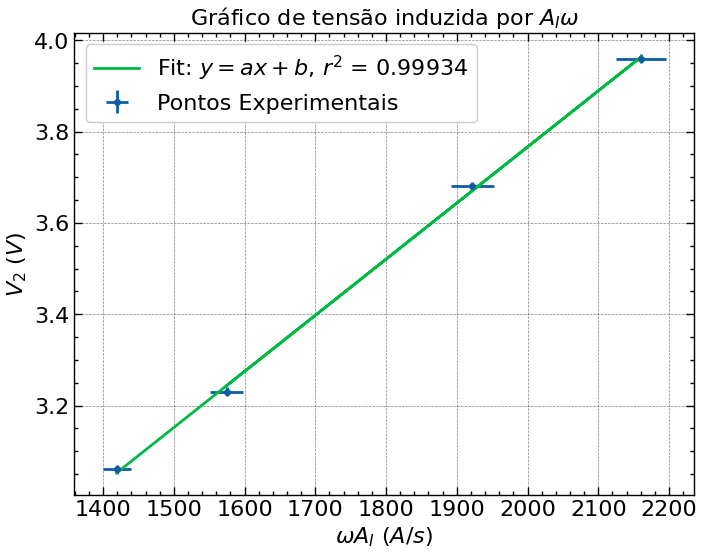

In [252]:
plt.errorbar(x_data, y_data, xerr=x_data_err, yerr=y_data_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(x_data, func(x_data,a,b) , label= r'Fit: $y = ax + b$, $r^2$ = %.5f' % (r2))

plt.xlabel(r'$ \omega A_I \ (A/s)$')
plt.ylabel(r'$V_2 \ (V) $')
plt.title(r'Gráfico de tensão induzida por $A_I \omega$')

plt.legend()